In [2]:
! pip install darts

     |████████████████████████████████| 963 kB 61.9 MB/s            
     |████████████████████████████████| 2.0 MB 24.8 MB/s            
     |████████████████████████████████| 575 kB 64.7 MB/s            
     |████████████████████████████████| 47 kB 8.4 MB/s             
     |████████████████████████████████| 47 kB 10.3 MB/s            
     |████████████████████████████████| 9.9 MB 64.8 MB/s            
     |████████████████████████████████| 1.9 MB 42.8 MB/s            
     |████████████████████████████████| 81 kB 15.5 MB/s            
     |████████████████████████████████| 139 kB 62.9 MB/s            
     |████████████████████████████████| 529 kB 41.1 MB/s            
     |████████████████████████████████| 125 kB 61.1 MB/s            
     |████████████████████████████████| 87 kB 11.5 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 3.5 MB 21.5 MB/s            
     |████████████████████████████████| 16.9 MB 59.2 MB/s     

<AxesSubplot:>

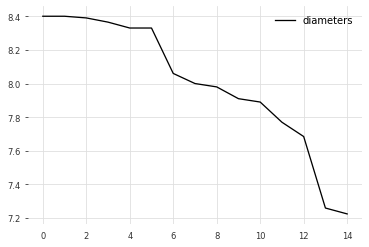

In [48]:
from darts.timeseries import TimeSeries
import pandas as pd

diameters = [8.4, 8.4, 8.39, 8.365, 8.33, 8.33, 8.06, 8.00, 7.98, 7.91, 7.89, 7.77, 7.685, 7.26, 7.225]
expected = [7.18, 6.97]
df = pd.DataFrame(data={'diameters':diameters})
df.plot()

In [24]:
from darts.models  import RegressionModel
tm_target = TimeSeries.from_series(df['diameters'])
model = RegressionModel(lags=1, output_chunk_length=3)
model.fit(tm_target)
tm_result = model.predict(n=2)
print('expected', expected)
print('predicted', [round(val[0], 2) for val in tm_result.values()])

expected [7.18, 6.97]
predicted [7.13, 6.8]


In [30]:
from darts.models  import RandomForest 
# RandomForest Regression 
# https://unit8co.github.io/darts/generated_api/darts.models.forecasting.random_forest.html

tm_target = TimeSeries.from_series(df['diameters'])
model = RandomForest(lags=2, output_chunk_length=2)
model.fit(tm_target)
tm_result = model.predict(n=2)
print('expected', expected)
print('predicted', [round(val[0], 2) for val in tm_result.values()])

expected [7.18, 6.97]
predicted [7.39, 7.26]


Сравнение линейная регрессия справилась лучше, чем регрессия случайного леса

,drops,avg_drops
0,150.122,150.122000
1,150.144,150.134000
2,150.275,150.189780
3,150.551,150.306060
4,150.072,150.240839


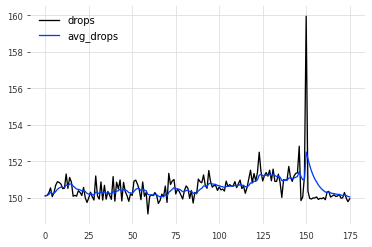

In [52]:
import pandas as pd
df_drops = pd.read_csv('labregr_data.csv')
df_drops['drops'] = [float(val.replace(",", ".")) for val in df_drops['drops'].values]
df_drops['avg_drops'] = df_drops['drops'].ewm(5).mean()
expected_drops = [150.1, 150.19]
df_drops.plot()
df_drops.head()

In [54]:
tm_target = TimeSeries.from_series(df_drops['avg_drops'])
model = RegressionModel(lags=1, output_chunk_length=3)
model.fit(tm_target)
tm_result = model.predict(n=2)
print('expected', expected_drops)
print('predicted', [round(val[0], 4) for val in tm_result.values()])

expected [150.1, 150.19]
predicted [150.0957, 150.1313]
